In [23]:
try:
    import numpy as np; import scipy as sc; import matplotlib.pyplot as plt; import uncertainties
except ImportError:
    import sys
    !{sys.executable} -m pip install numpy scipy matplotlib pathlib uncertainties 
    print("Restart your kernel and try again")

## Importing Data

We want to laod data from text based files output from the Xuess machine. These files can be found at the file directory, 

`C:/username/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Xeuss 3_WSU_NSC_Logistics and Data/Xeuss 3 Data/Collins/GIWAXS_ZnPc1`

Now looking at one of these files, we see that there is a header filled with information about the beam and it's energy. The data we care for starts on line 116.

In [95]:
import numpy as np; import matplotlib.pyplot as plt
#Change the run to whatever run number you are on
run = 'GIWAXS_ZnPc1_0_00000'

#Set this to the file path of your data
dpath = 'C:/Users/hduva/Washington State University (email.wsu.edu)/Carbon Lab Research Group - Documents/Xeuss 3_WSU_NSC_Logistics and Data/Xeuss 3 Data/Collins/GIWAXS_ZnPc1/'+run
datpath = dpath  + '.dat' #1D data path
edfpath = dpath  + '.edf' #2D image path

#We know the data starts on line 116
data = np.loadtxt(datpath, skiprows = 116) 
print(data)

[[ 3.05624809e-04  3.07798092e+05  3.02902157e+01]
 [ 9.16874427e-04  2.87506232e+05  2.07003673e+01]
 [ 1.52812404e-03  2.59668357e+05  1.24421079e+01]
 ...
 [ 7.05076434e-01 -5.55396514e-06  9.94893389e-05]
 [ 7.05687684e-01 -5.55438610e-06  1.17726296e-04]
 [ 7.06298933e-01 -5.55483449e-06  1.51996263e-04]]


## Plotting

Moving onto our plotting we can do this either implictly or we can build figures. Documentation on this can be found though the [Matplotlib](https://matplotlib.org/) website. Since we want to use figures, we will use a more expicit method.

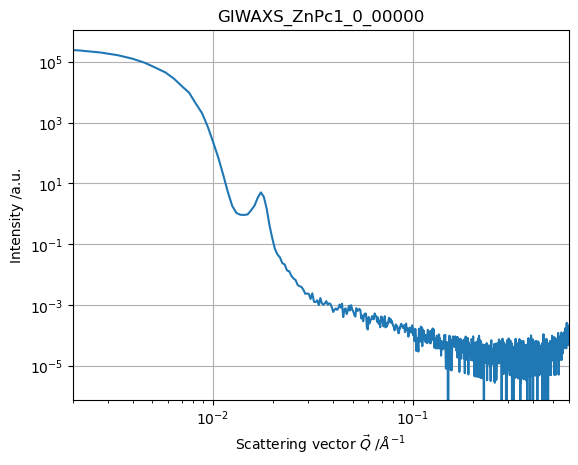

In [96]:
fig1, ax1 = plt.subplots()
ax1.loglog(data[:,0],data[:,1])
ax1.set_xlim(.002,.6)
ax1.set_xlabel(r'Scattering vector $\vec{Q}$ /$\AA^{-1}$ ')
ax1.set_ylabel('Intensity /a.u.')
ax1.set_title(run)
ax1.grid()

Now, if we want to plot the 2d picture, we need do do a couple of other things. We need to be able to read .edf files. Thank you to Aurelien Gourrier for recomending FabIO

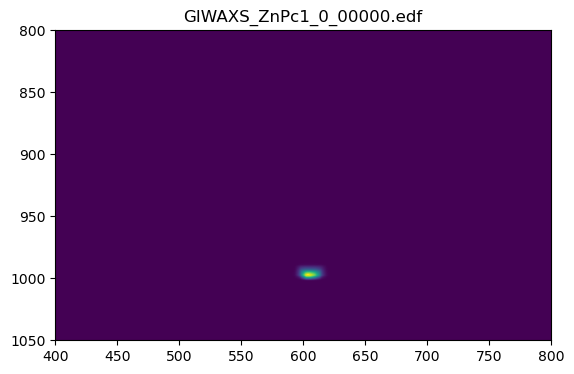

In [97]:
import fabio
img = fabio.open(edfpath)
#print(img.header)


plt.imshow(img.data)# Display as an image
plt.title(str(img.header['title']))
plt.xlim(400,800)
plt.ylim(1050,800)
plt.show()# Show GUI window

#I dont know how we can be qualetative here with the heatmaps and whatnot. 